<a href="https://colab.research.google.com/github/nafl13/ICT_DSA/blob/Assignments/Copy_of_Casestudy_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [7]:
df = pd.read_csv('/content/drive/MyDrive/House_Pricing.csv')
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [8]:
df.shape

(21613, 21)

In [9]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [11]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [12]:
df.drop(['Date House was Sold'],axis=1,inplace=True)

In [13]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [14]:
df.drop(['ID','No of Times Visited'],axis=1,inplace=True)

In [15]:
df['Zipcode'].nunique()

70

In [16]:
df['Latitude'].nunique()

5034

In [17]:
df['Longitude'].nunique()

752

In [18]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [19]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,8,1530.0,0,9,0,98103.0,1530.0,1509
21609,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,8,2310.0,0,4,0,98146.0,1830.0,7200
21610,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,7,1020.0,0,9,0,98144.0,1020.0,2007
21611,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,8,1600.0,0,14,0,98027.0,1410.0,1287


In [20]:
df['Condition of the House'].nunique()

5

In [21]:
df['Waterfront View'].nunique()

2

In [22]:
print(df['Condition of the House'].unique())

['Fair' 'Excellent' 'Good' 'Bad' 'Okay']


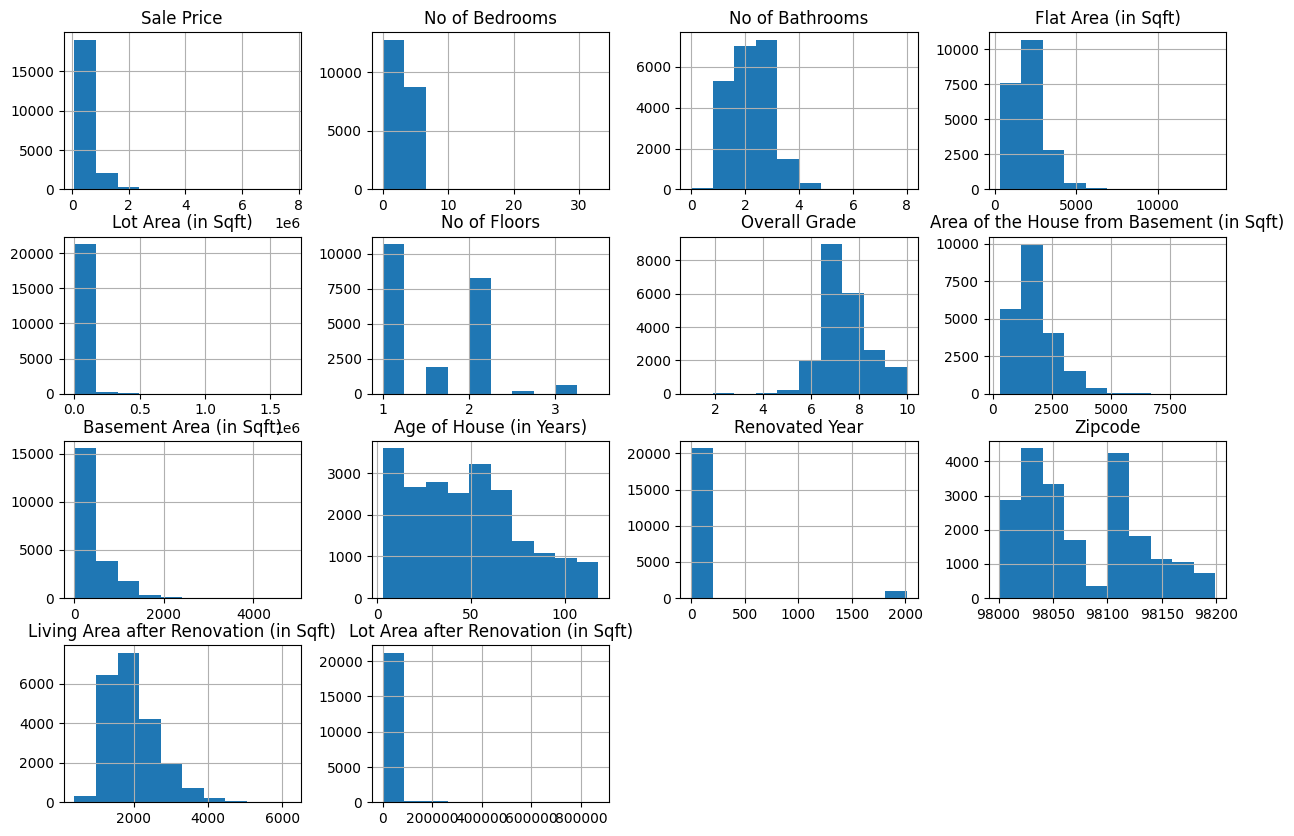

In [23]:
import matplotlib.pyplot as plt
freqplot = df.select_dtypes(include = ['float','int'])
freqplot.hist(figsize = (15,10))
plt.show()

In [24]:
col = ['Sale Price', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)',
       'Zipcode', 'Living Area after Renovation (in Sqft)']
col

['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Living Area after Renovation (in Sqft)']

In [25]:
for i in col:
  df[i]=df[i].fillna(df[i].median())
df.isna().sum()

,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0
Overall Grade,0
Area of the House from Basement (in Sqft),0


In [26]:
df.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401817e+05,3.370842,2.114757,2079.861010,1.510464e+04,1.494309,7.623467,1788.312497,291.509045,46.994864,84.402258,98077.937167,1986.532133,12768.455652
std,3.673570e+05,0.930062,0.770069,918.302876,4.141992e+04,0.539989,1.105439,827.929506,442.575043,29.373411,401.679240,53.504259,685.389122,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,6210.000000,871200.000000


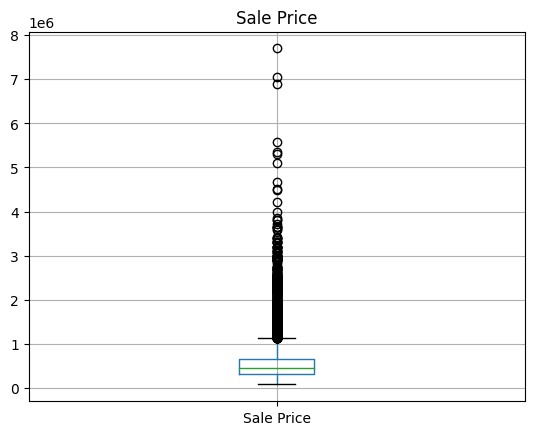

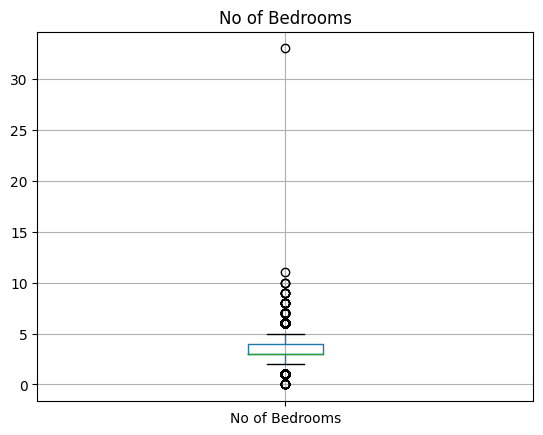

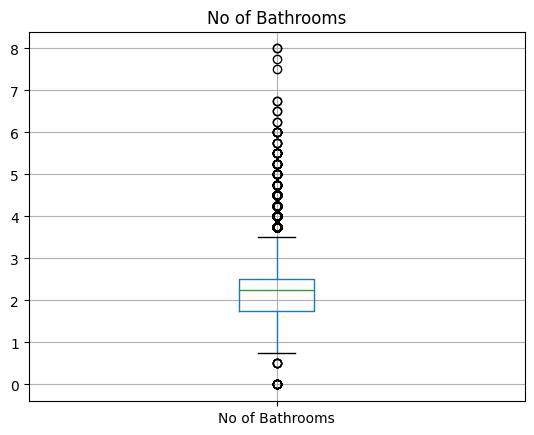

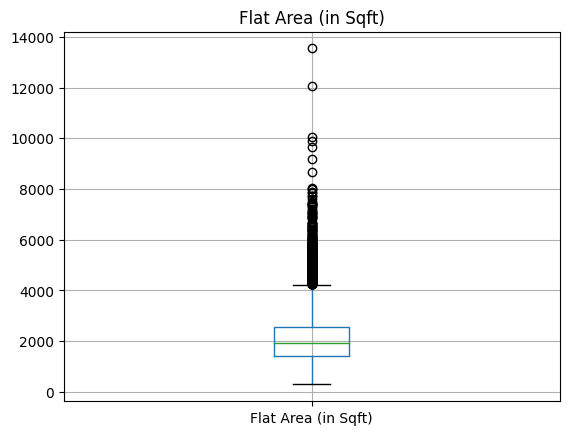

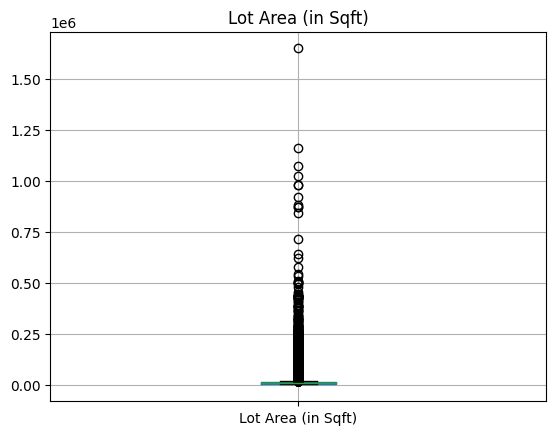

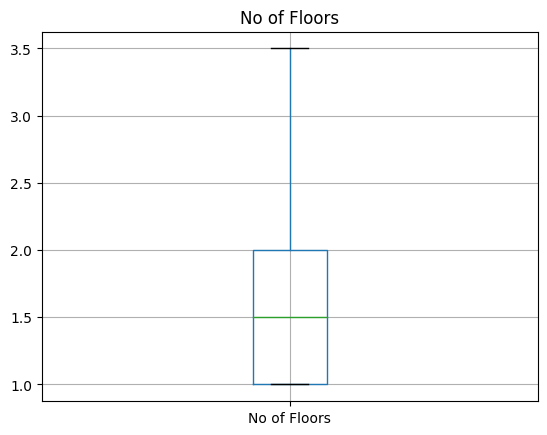

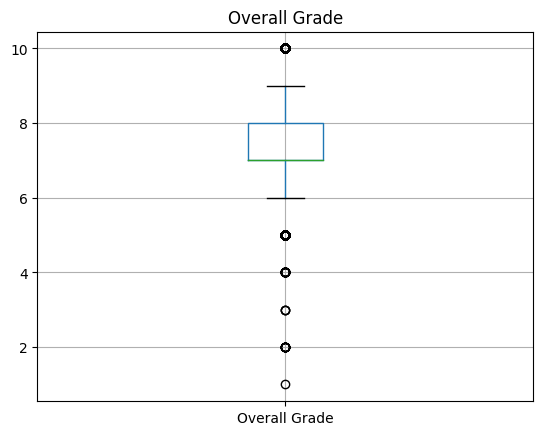

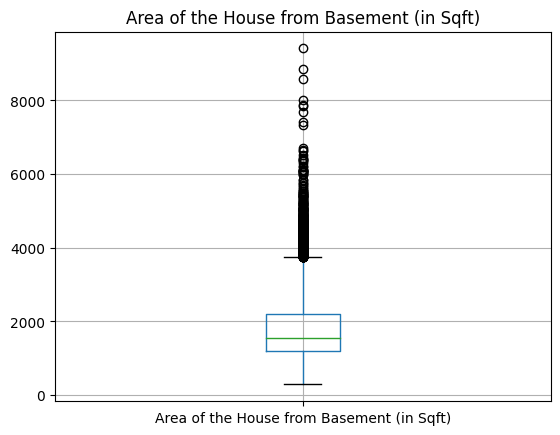

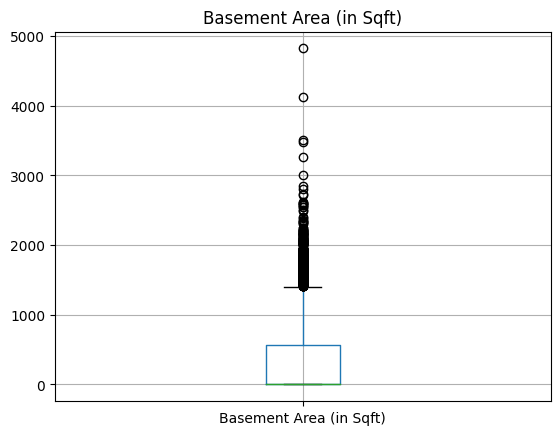

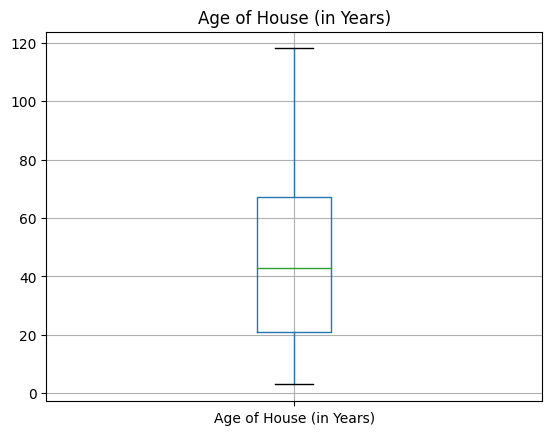

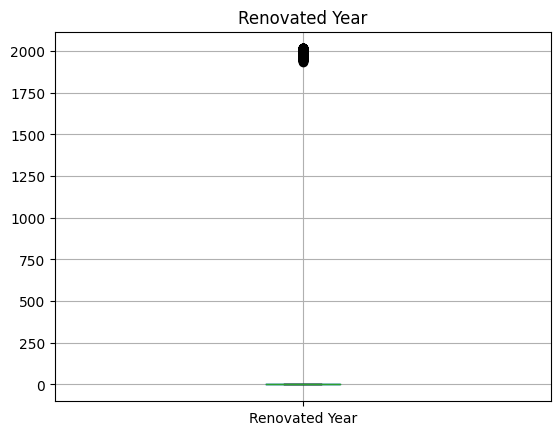

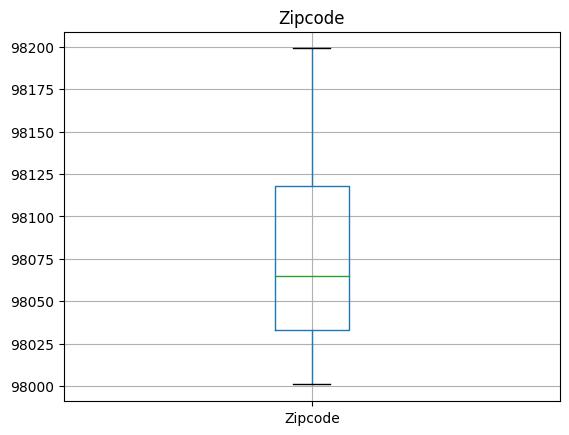

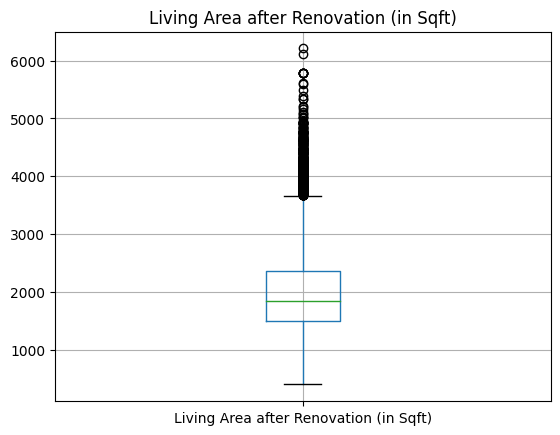

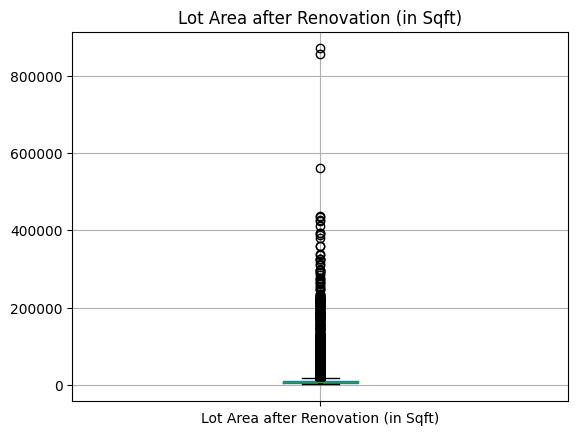

In [27]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)


In [28]:
for column in df.select_dtypes(include=['number']):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  print(f"Outliers in {column}: {count}")


Outliers in Sale Price: 1159
Outliers in No of Bedrooms: 546
Outliers in No of Bathrooms: 571
Outliers in Flat Area (in Sqft): 572
Outliers in Lot Area (in Sqft): 2423
Outliers in No of Floors: 0
Outliers in Overall Grade: 1911
Outliers in Area of the House from Basement (in Sqft): 610
Outliers in Basement Area (in Sqft): 496
Outliers in Age of House (in Years): 0
Outliers in Renovated Year: 914
Outliers in Zipcode: 0
Outliers in Living Area after Renovation (in Sqft): 544
Outliers in Lot Area after Renovation (in Sqft): 2194


In [29]:
outlier_cols = []
for column in df.select_dtypes(include=['number']):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  if count > 0:
    outlier_cols.append(column)
print(outlier_cols)


['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Renovated Year', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [30]:
for column in outlier_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = df[column].clip(lower_bound, upper_bound)


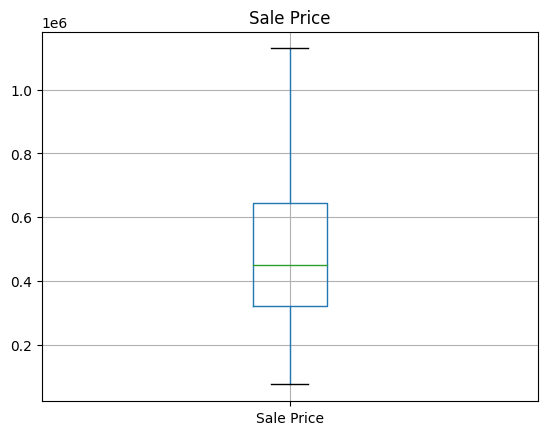

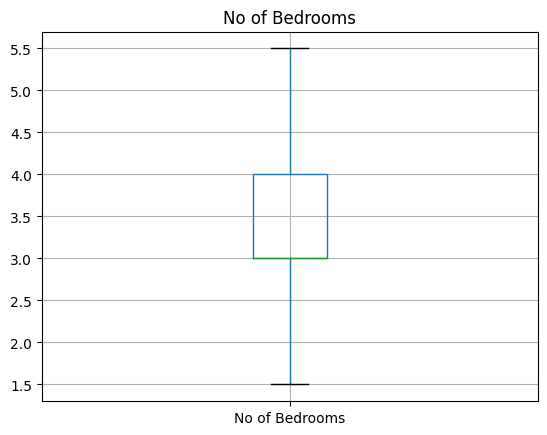

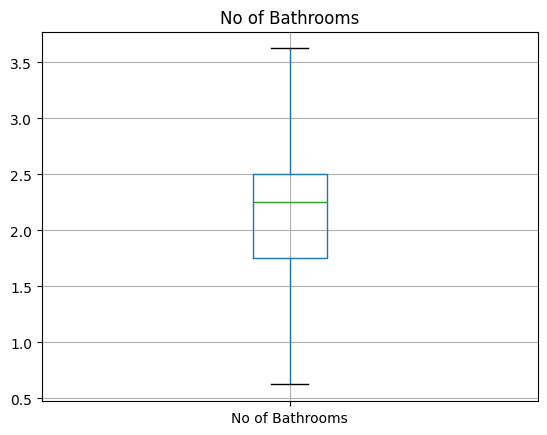

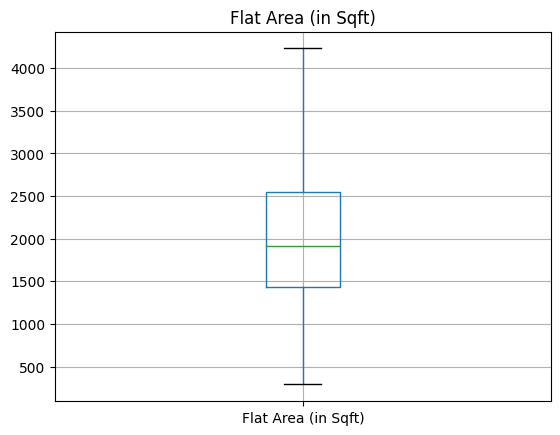

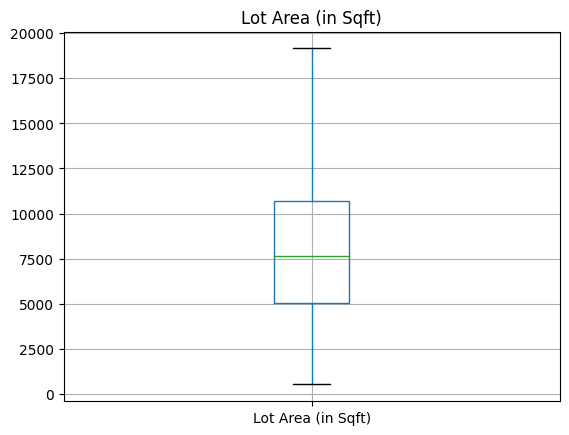

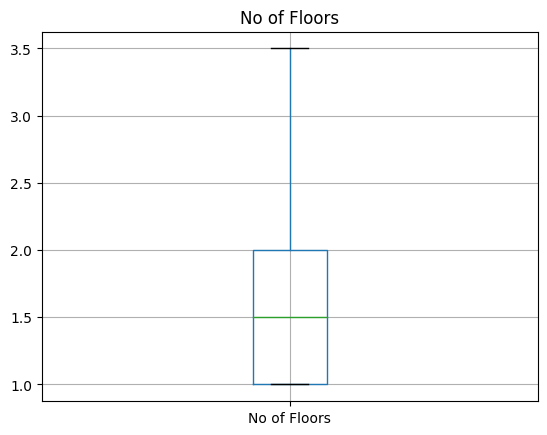

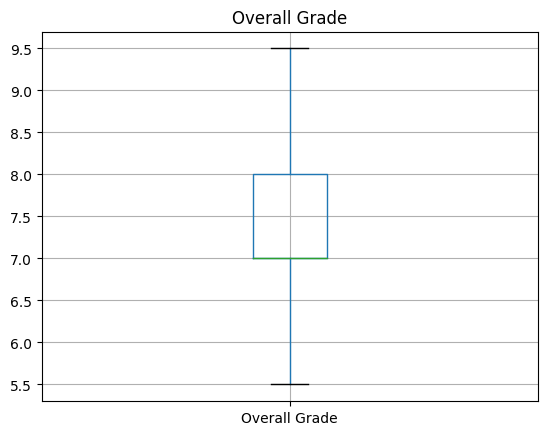

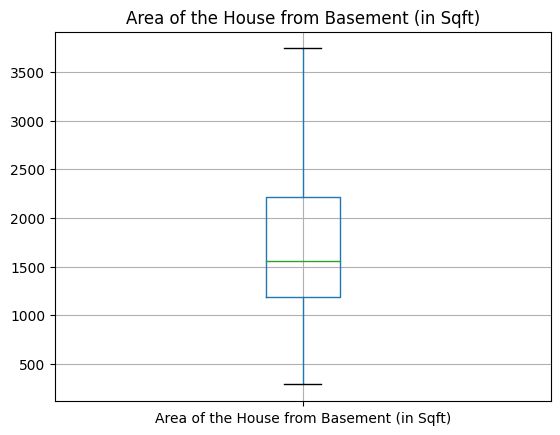

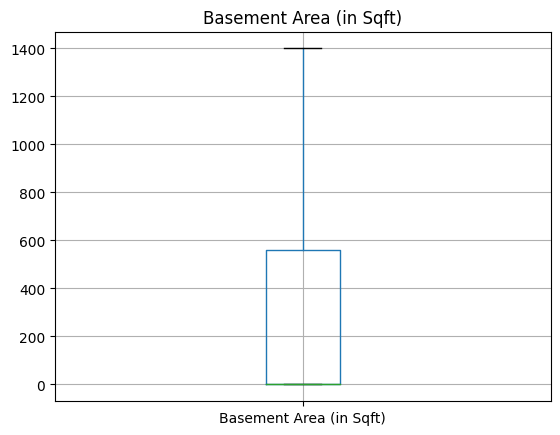

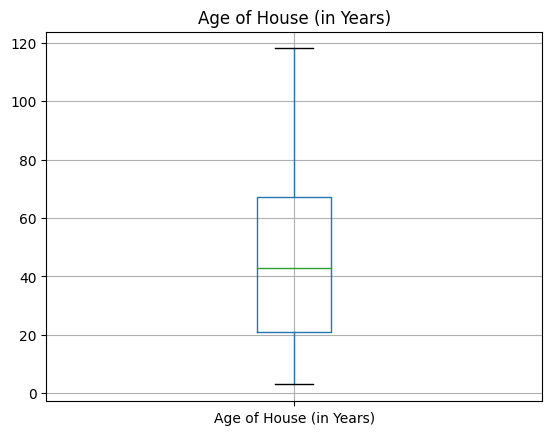

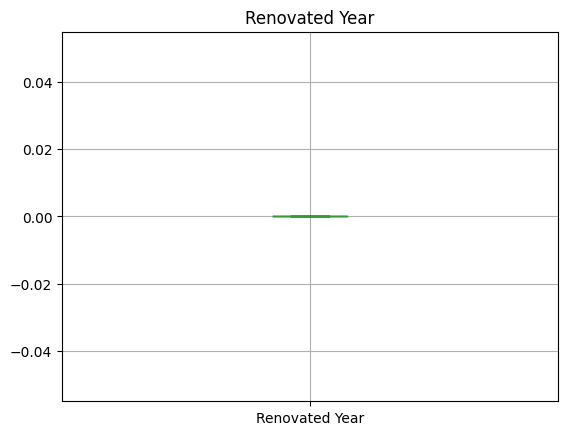

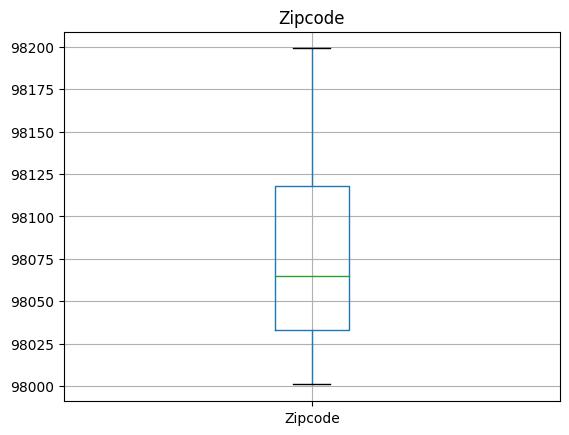

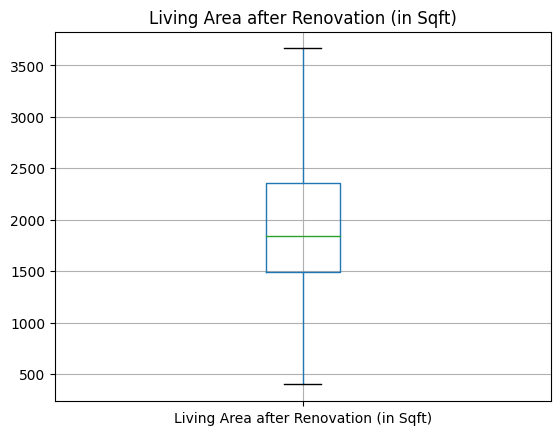

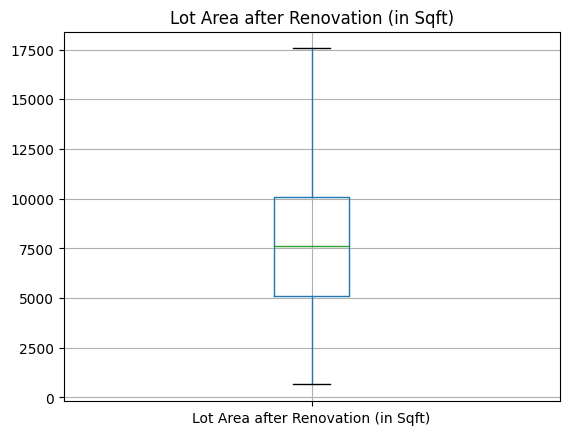

In [31]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)


In [32]:
product_type_order = ['No','Yes']
oe = OrdinalEncoder(categories=[product_type_order])
df['Waterfront View'] = oe.fit_transform(df[['Waterfront View']])
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,Fair,7.0,1180.0,0,63,0,98178.0,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,Fair,7.0,2170.0,400,67,0,98125.0,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,Fair,6.0,770.0,0,85,0,98028.0,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,Excellent,7.0,1050.0,910,53,0,98136.0,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,Fair,8.0,1680.0,0,31,0,98074.0,1800.0,7503.0


In [33]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,Fair,7.0,1180.0,0,63,0,98178.0,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,Fair,7.0,2170.0,400,67,0,98125.0,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,Fair,6.0,770.0,0,85,0,98028.0,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,Excellent,7.0,1050.0,910,53,0,98136.0,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,Fair,8.0,1680.0,0,31,0,98074.0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,Fair,8.0,1530.0,0,9,0,98103.0,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,Fair,8.0,2310.0,0,4,0,98146.0,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,Fair,7.0,1020.0,0,9,0,98144.0,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,Fair,8.0,1600.0,0,14,0,98027.0,1410.0,1287.0


In [34]:
print(df['Condition of the House'].unique())

['Fair' 'Excellent' 'Good' 'Bad' 'Okay']


In [35]:
House_Condition = ['Bad','Okay','Fair','Good' , 'Excellent'  ]
oe = OrdinalEncoder(categories=[House_Condition])
df['Condition of the House'] = oe.fit_transform(df[['Condition of the House']])
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,2.0,7.0,1180.0,0,63,0,98178.0,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,2.0,7.0,2170.0,400,67,0,98125.0,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,2.0,6.0,770.0,0,85,0,98028.0,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,4.0,7.0,1050.0,910,53,0,98136.0,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,2.0,8.0,1680.0,0,31,0,98074.0,1800.0,7503.0


In [36]:
for column in df.select_dtypes(include=['number']):
    mms = MinMaxScaler()
    df[column] = mms.fit_transform(df[[column]])
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.139308,0.375,0.125000,0.225888,0.275325,0.0,0.0,0.5,0.375,0.257971,0.000000,0.521739,0.0,0.893939,0.288120,0.295685
1,0.439071,0.375,0.541667,0.578680,0.360767,0.4,0.0,0.5,0.375,0.544928,0.285714,0.556522,0.0,0.626263,0.395285,0.413332
2,0.099573,0.125,0.125000,0.121827,0.508788,0.0,0.0,0.5,0.125,0.139130,0.000000,0.713043,0.0,0.136364,0.710655,0.438352
3,0.501660,0.625,0.791667,0.423858,0.240440,0.0,0.0,1.0,0.375,0.220290,0.650000,0.434783,0.0,0.681818,0.294244,0.257238
4,0.412518,0.375,0.458333,0.352792,0.405743,0.0,0.0,0.5,0.625,0.402899,0.000000,0.243478,0.0,0.368687,0.428965,0.405288


In [37]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.139308,0.375,0.125000,0.225888,0.275325,0.0,0.0,0.5,0.375,0.257971,0.000000,0.521739,0.0,0.893939,0.288120,0.295685
1,0.439071,0.375,0.541667,0.578680,0.360767,0.4,0.0,0.5,0.375,0.544928,0.285714,0.556522,0.0,0.626263,0.395285,0.413332
2,0.099573,0.125,0.125000,0.121827,0.508788,0.0,0.0,0.5,0.125,0.139130,0.000000,0.713043,0.0,0.136364,0.710655,0.438352
3,0.501660,0.625,0.791667,0.423858,0.240440,0.0,0.0,1.0,0.375,0.220290,0.650000,0.434783,0.0,0.681818,0.294244,0.257238
4,0.412518,0.375,0.458333,0.352792,0.405743,0.0,0.0,0.5,0.625,0.402899,0.000000,0.243478,0.0,0.368687,0.428965,0.405288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.270270,0.375,0.625000,0.314721,0.032792,0.8,0.0,0.5,0.625,0.359420,0.000000,0.052174,0.0,0.515152,0.346295,0.050750
21609,0.308203,0.625,0.625000,0.512690,0.284074,0.4,0.0,0.5,0.625,0.585507,0.000000,0.008696,0.0,0.732323,0.438151,0.387366
21610,0.310195,0.125,0.041667,0.185279,0.044546,0.4,0.0,0.5,0.375,0.211594,0.000000,0.052174,0.0,0.722222,0.190141,0.080206
21611,0.308203,0.375,0.625000,0.332487,0.100255,0.4,0.0,0.5,0.625,0.379710,0.000000,0.095652,0.0,0.131313,0.309553,0.037619
